In [1]:
# common
import sys
import os
import os.path as op

# basic
import numpy as np
import pandas as pd
import xarray as xr
from scipy.io import loadmat
from time import time
import warnings
warnings.simplefilter('ignore')

# custom
from lib import calval

# functions
from lib import functions

In [2]:
# initial time to see the duration of the notebook
t0 = time()

In [3]:
# data 
p_data = op.join(os.getcwd(), 'data')

buoy       =  pd.read_pickle(op.join(p_data, 'buoy', 'Bilbao-Vizcaya Ext.pkl'))
csiro      =  pd.read_pickle(op.join(p_data, 'hindcast', 'csiro_dataframe.pkl'))
satellite  =  xr.open_dataset(op.join(p_data, 'satellite', 'satellite_dataset.nc'))

print('---------------------------------------------------')
print('Time wasted reading the data: ' + str(round(time()-t0, 2)) + ' s')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted reading the data: 0.19 s
---------------------------------------------------


In [4]:
t1 = time()

--------------------------------------------------------
SAT CALIBRATION will be performed
-------------------------------------------------------- 
 
Satellite box values: 
South latitude: 43.8
North latitude: 44.2
West latitude: 356.2
East latitude: 356.6
 
 
Selecting the satellite data choosed... 
 
Satellite length: 10390 
 
Hindcast information able to calibrate: 301679 
 
Choose the way to calibrate the data: 
True: hindcast for each satellite 
False: satellite for each hindcast 
----- Select ----- : False
 
 
Performing the time calibration... 
 
Length of data to calibrate: 5134 
 
 
 
Constructing matrices and calibrating... 
 
Value to set the umbral for not enough data to calibrate, 
this value can be set to 0.01, 0.02 or 0.03: 
----- Threshold ----- : 0.015
 
 
 
 
Params used for the SATELLITE calibration are: 
 
[1.20972875 1.1377573  0.92041271 1.03629377 1.08686969 1.
 0.9347338  1.         1.44979334 1.         1.         1.
 0.98502832 1.02447509 1.02875967 1.1872768

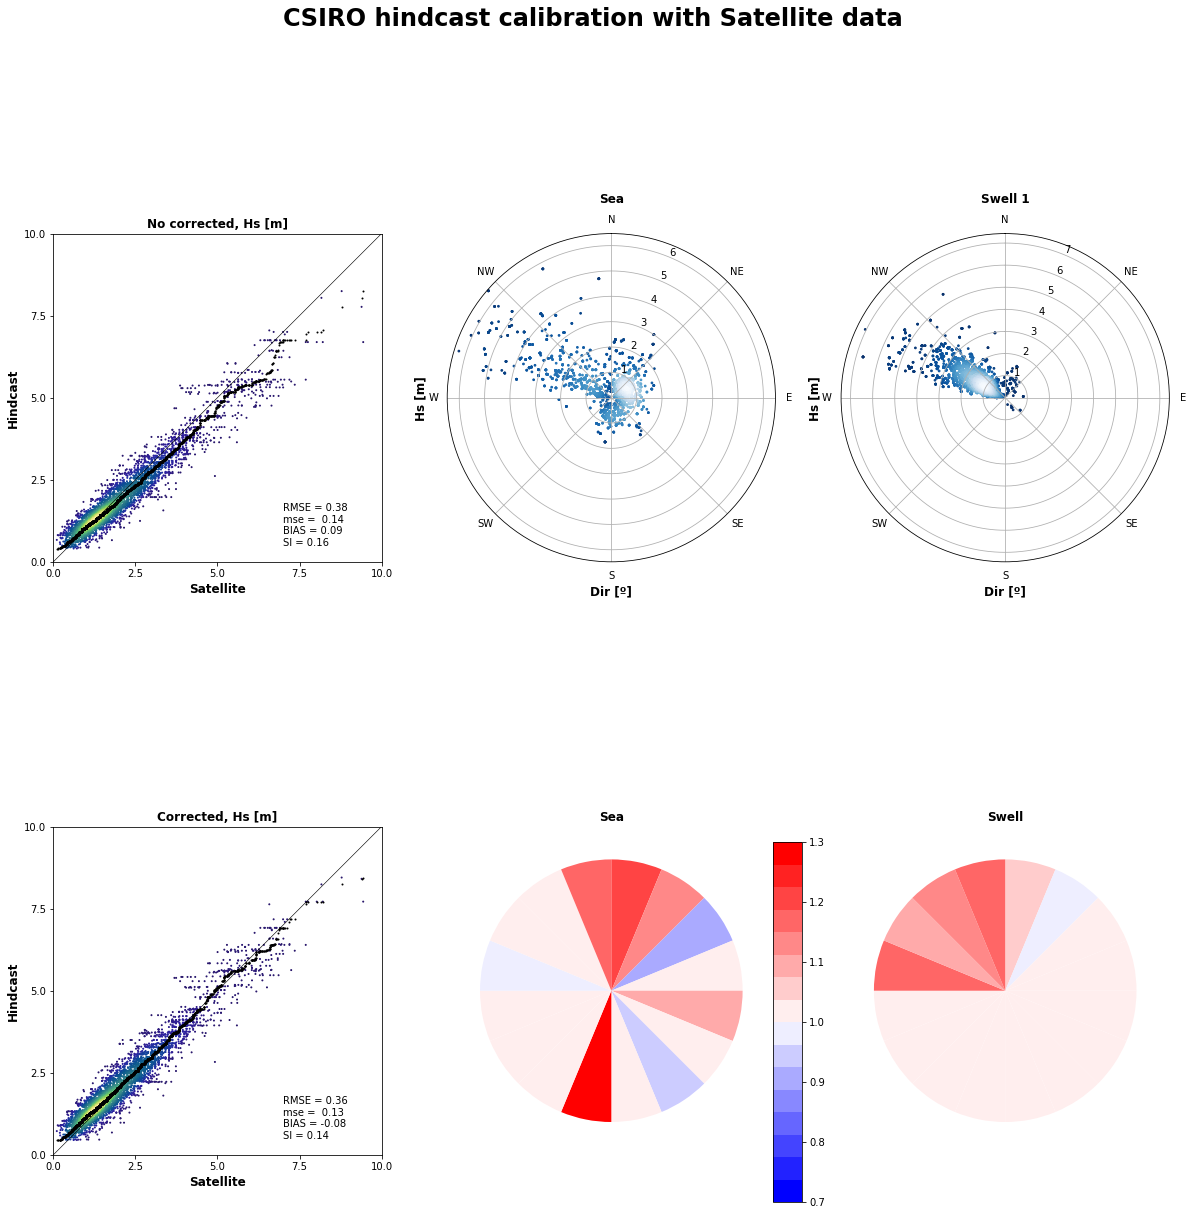

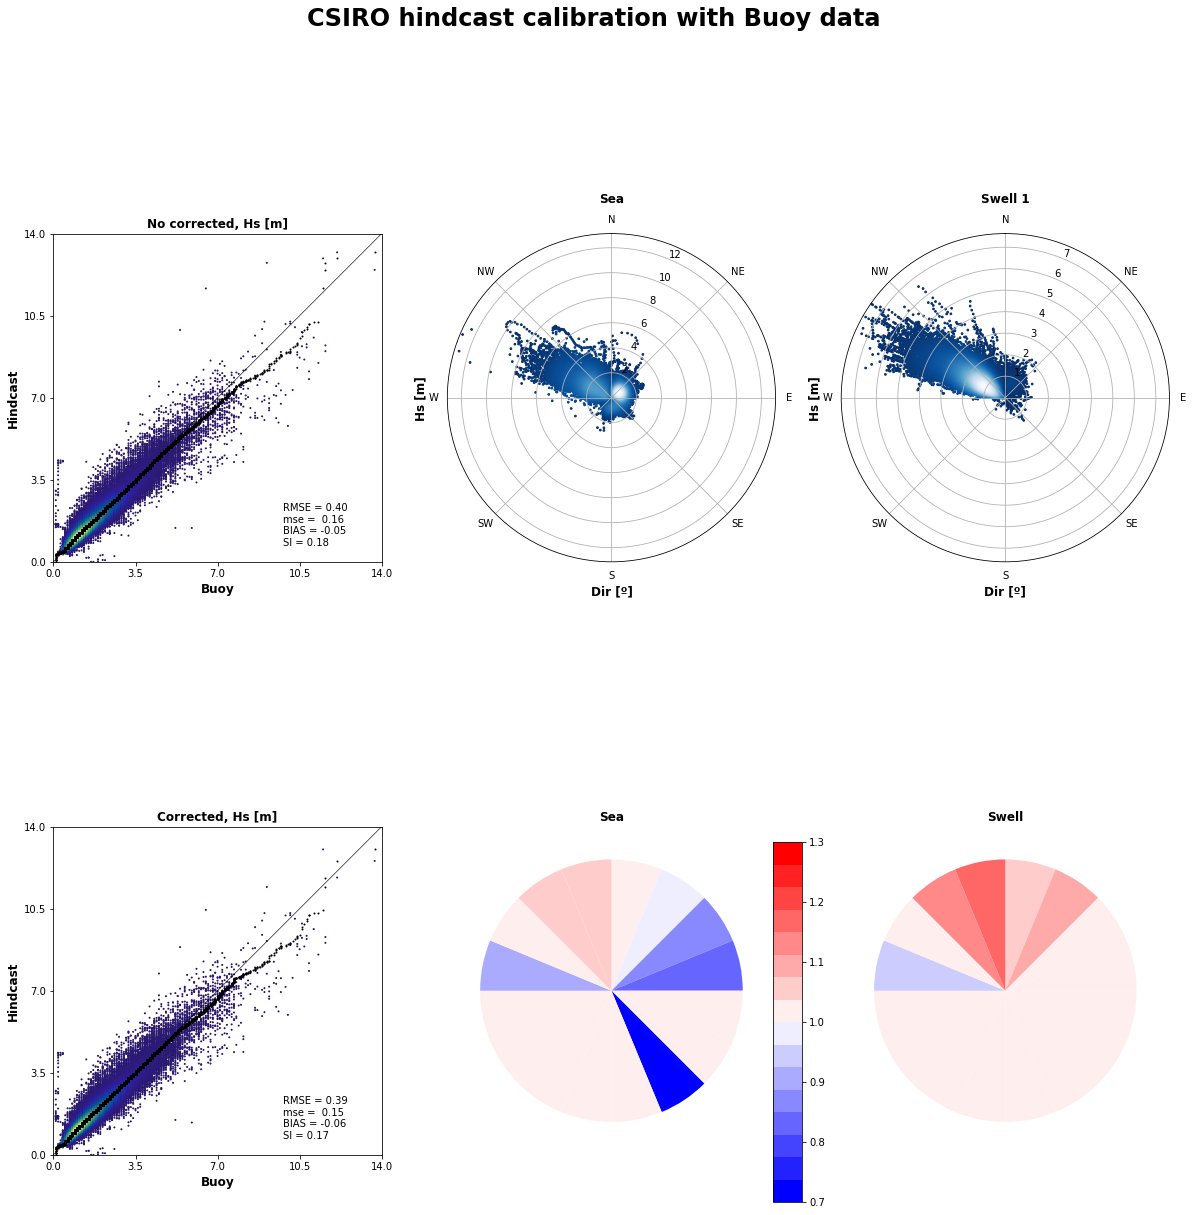

In [5]:
# creation of the main object

#######################################################
###   VALUES WILL HAVE TO BE INSERTED SO BE READY   ###
###   Satellite box :    South = 43.8               ###
###                      North = 44.2               ###
###                      West  = 356.2              ###
###                      East  = 356.6              ###
###   Time calibration:  False                      ###
###   Threshold :        0.015                      ###
#######################################################

# the Threshold allows us to delete not relevant information

calval_case = calval.CalVal(buoy, csiro, satellite, 'CSIRO')

print('---------------------------------------------------')
print('Time wasted initializing the constructor: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

In [6]:
t1 = time()

In [7]:
# calval_case.hindcast_sat_corr.to_pickle(op.join(p_data, 'hindcast', 'csiro_dataframe_sat_corr.pkl'))
# calval_case.hindcast_buoy_corr.to_pickle(op.join(p_data, 'hindcast', 'csiro_dataframe_buoy_corr.pkl'))

--------------------------------------------------------
RAW comparison will be performed
-------------------------------------------------------- 
 
Number of years: 3
Years separated by one space: 2006 2007 2008
 
 
Comparing data... 
 


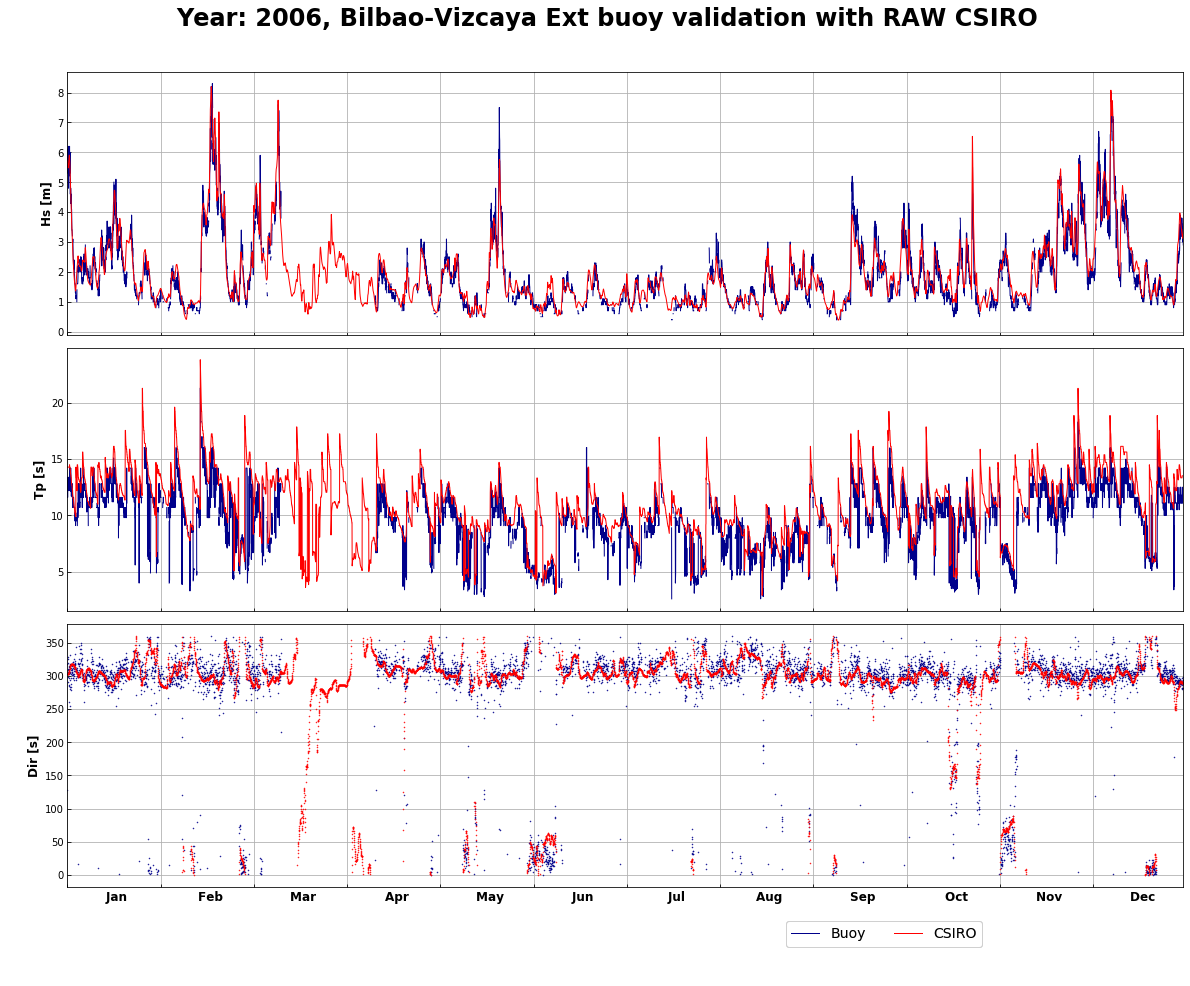

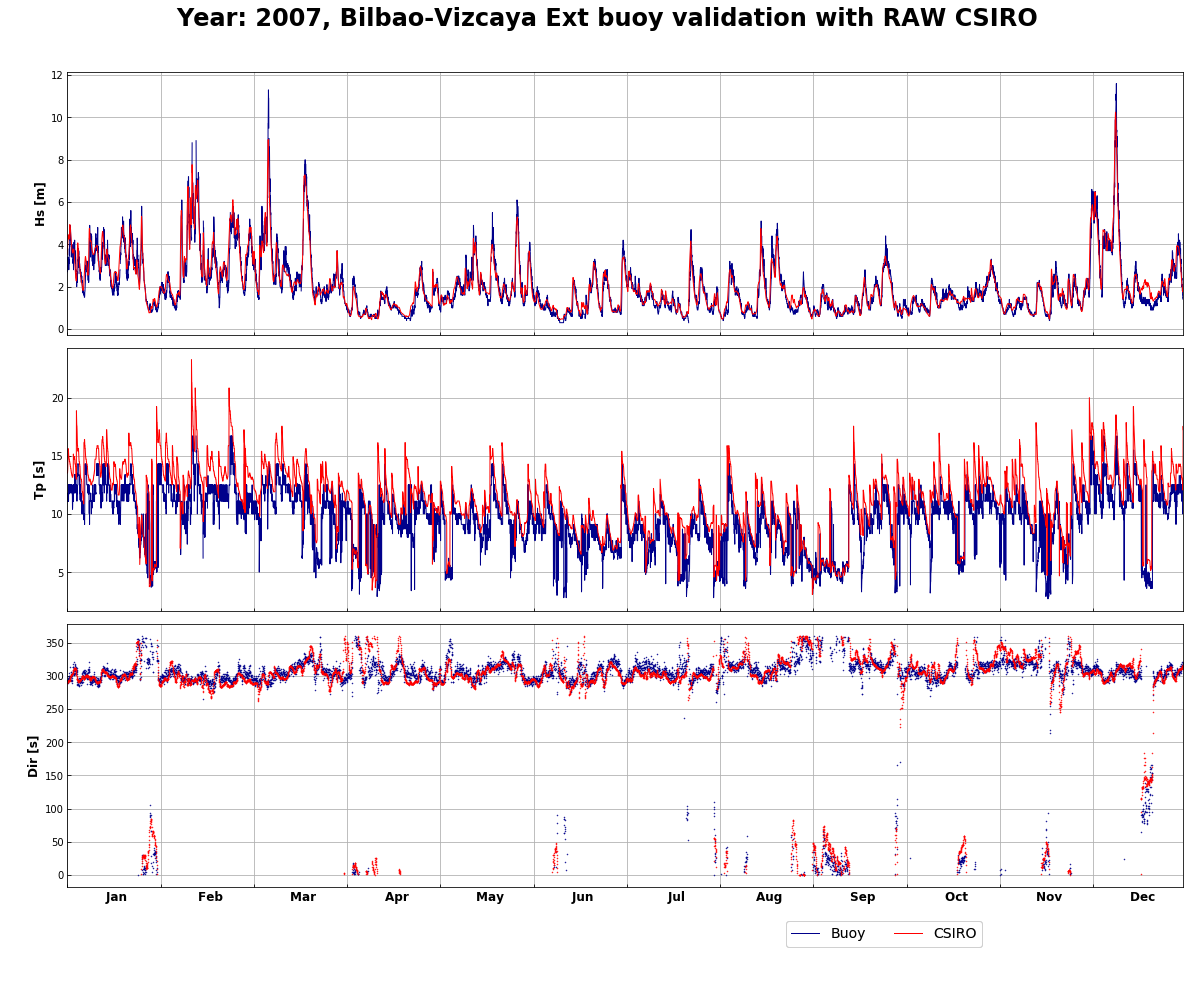

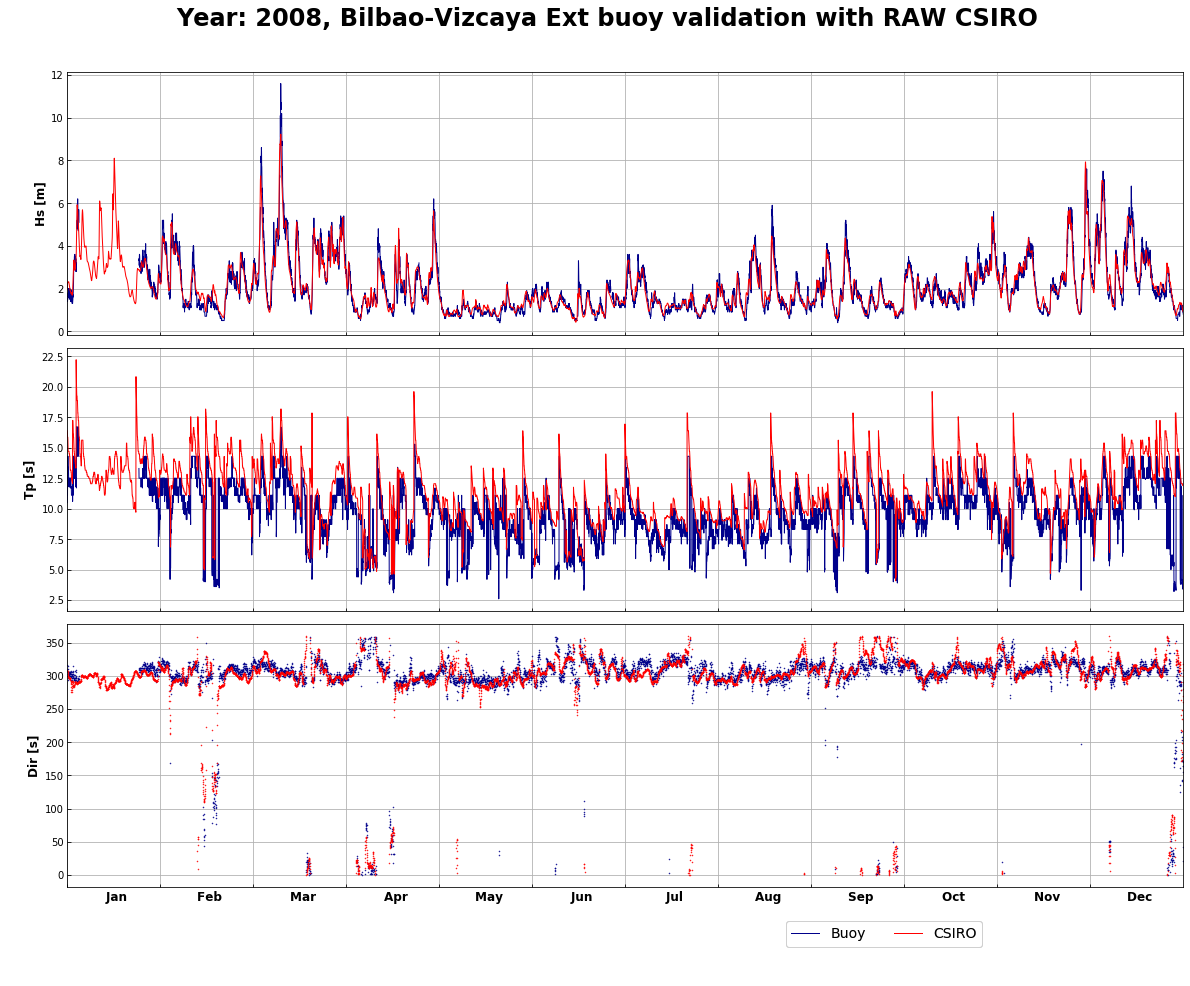

In [8]:
# comparisons

#######################################################
###   VALUES WILL HAVE TO BE INSERTED SO BE READY   ###
###   Number of years :    3                        ###
###   Years :              2006 2007 2008           ###
#######################################################

calval_case.buoy_comparison('raw')

--------------------------------------------------------
SAT_CORR comparison will be performed
-------------------------------------------------------- 
 
Number of years: 3
Years separated by one space: 2006 2007 2008
 
 
Comparing data... 
 


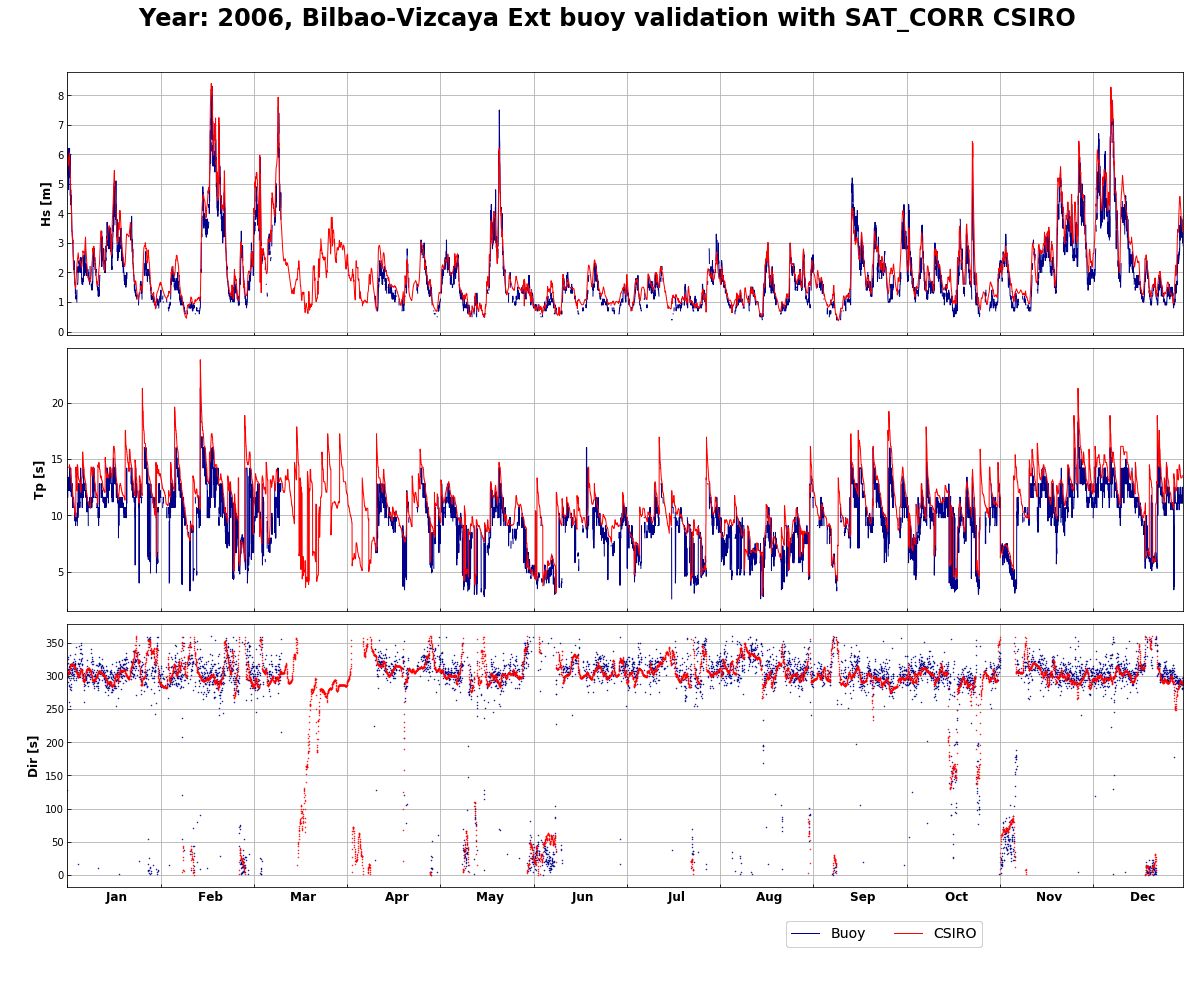

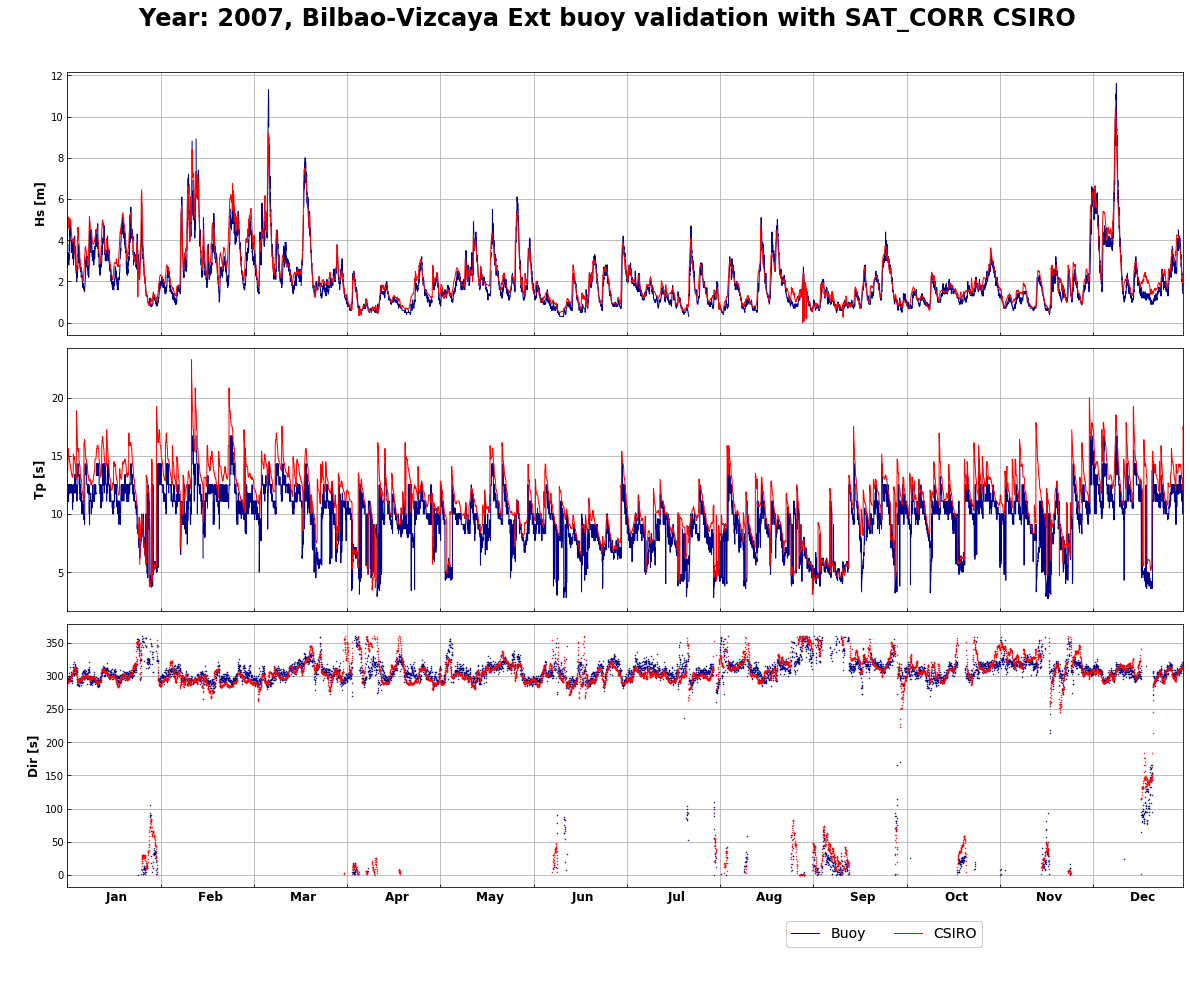

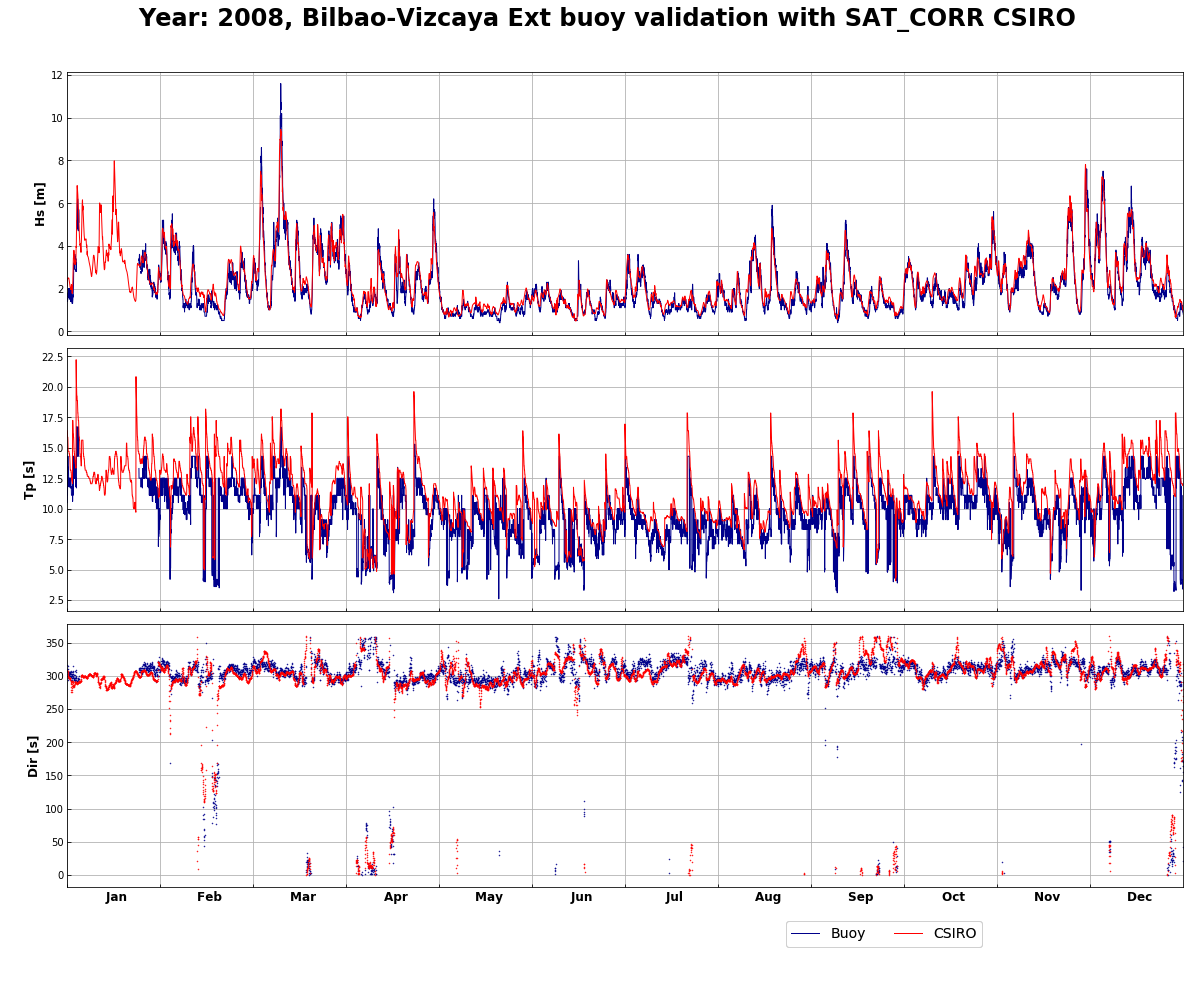

In [9]:
calval_case.buoy_comparison('sat_corr')

--------------------------------------------------------
BUOY_CORR comparison will be performed
-------------------------------------------------------- 
 
Number of years: 3
Years separated by one space: 2006
 
 
Comparing data... 
 


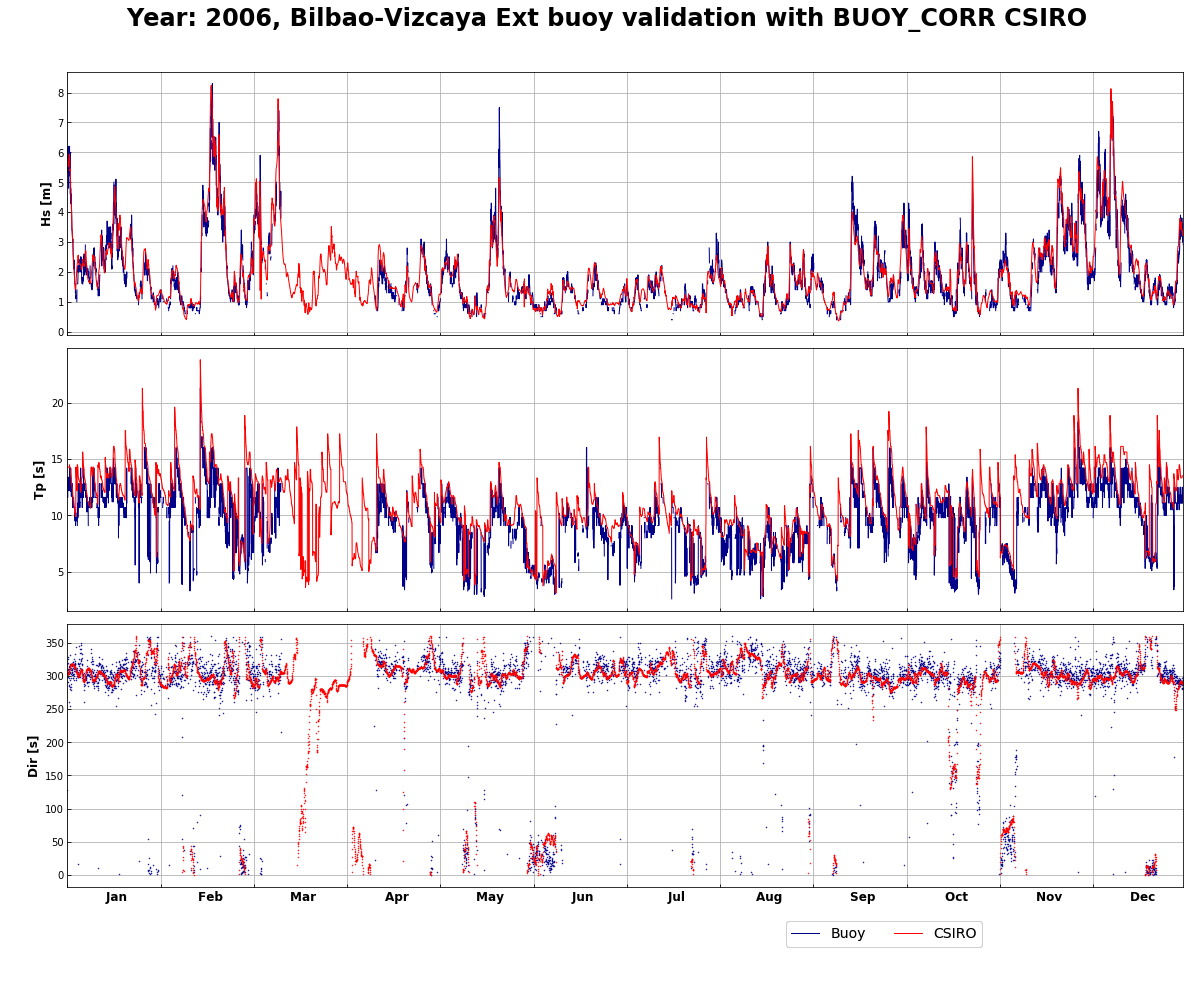

In [10]:
calval_case.buoy_comparison('buoy_corr')

In [11]:
print('---------------------------------------------------')
print('Time wasted comparing: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted comparing: 2.45 m
---------------------------------------------------


In [12]:
t1 = time()

--------------------------------------------------------
RAW VALIDATION will be performed
-------------------------------------------------------- 
 
Validating and plotting validated data... 
 
Length of data to validate: 59119 
 


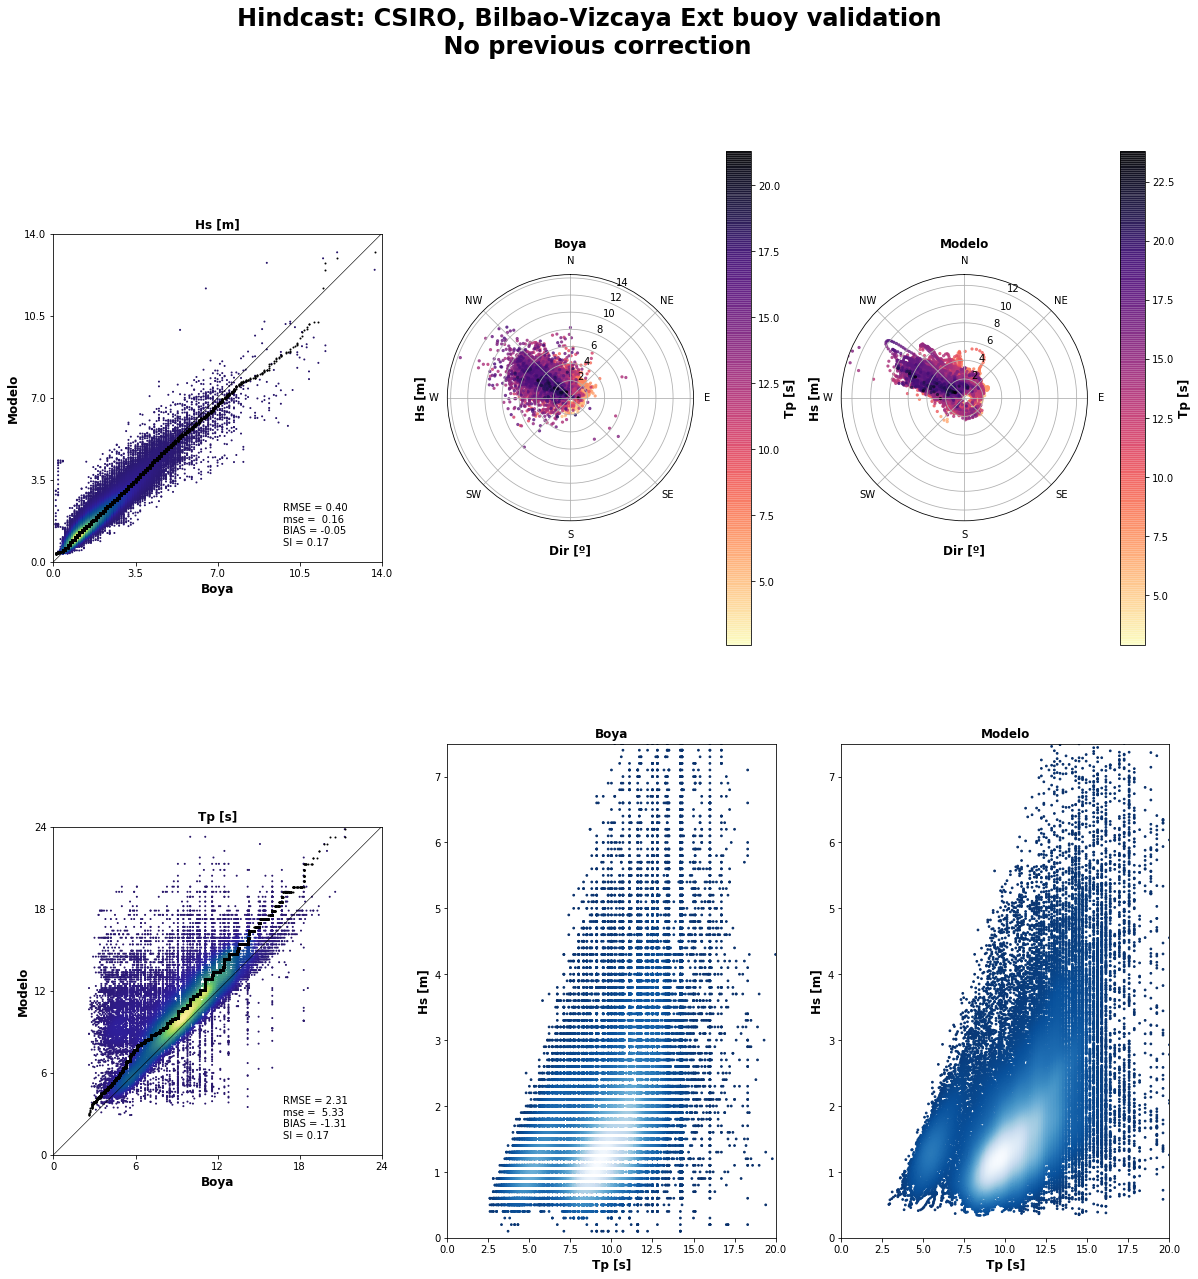

In [13]:
# validations

calval_case.buoy_validation('raw')

--------------------------------------------------------
SAT_CORR VALIDATION will be performed
-------------------------------------------------------- 
 
Validating and plotting validated data... 
 
Length of data to validate: 59119 
 


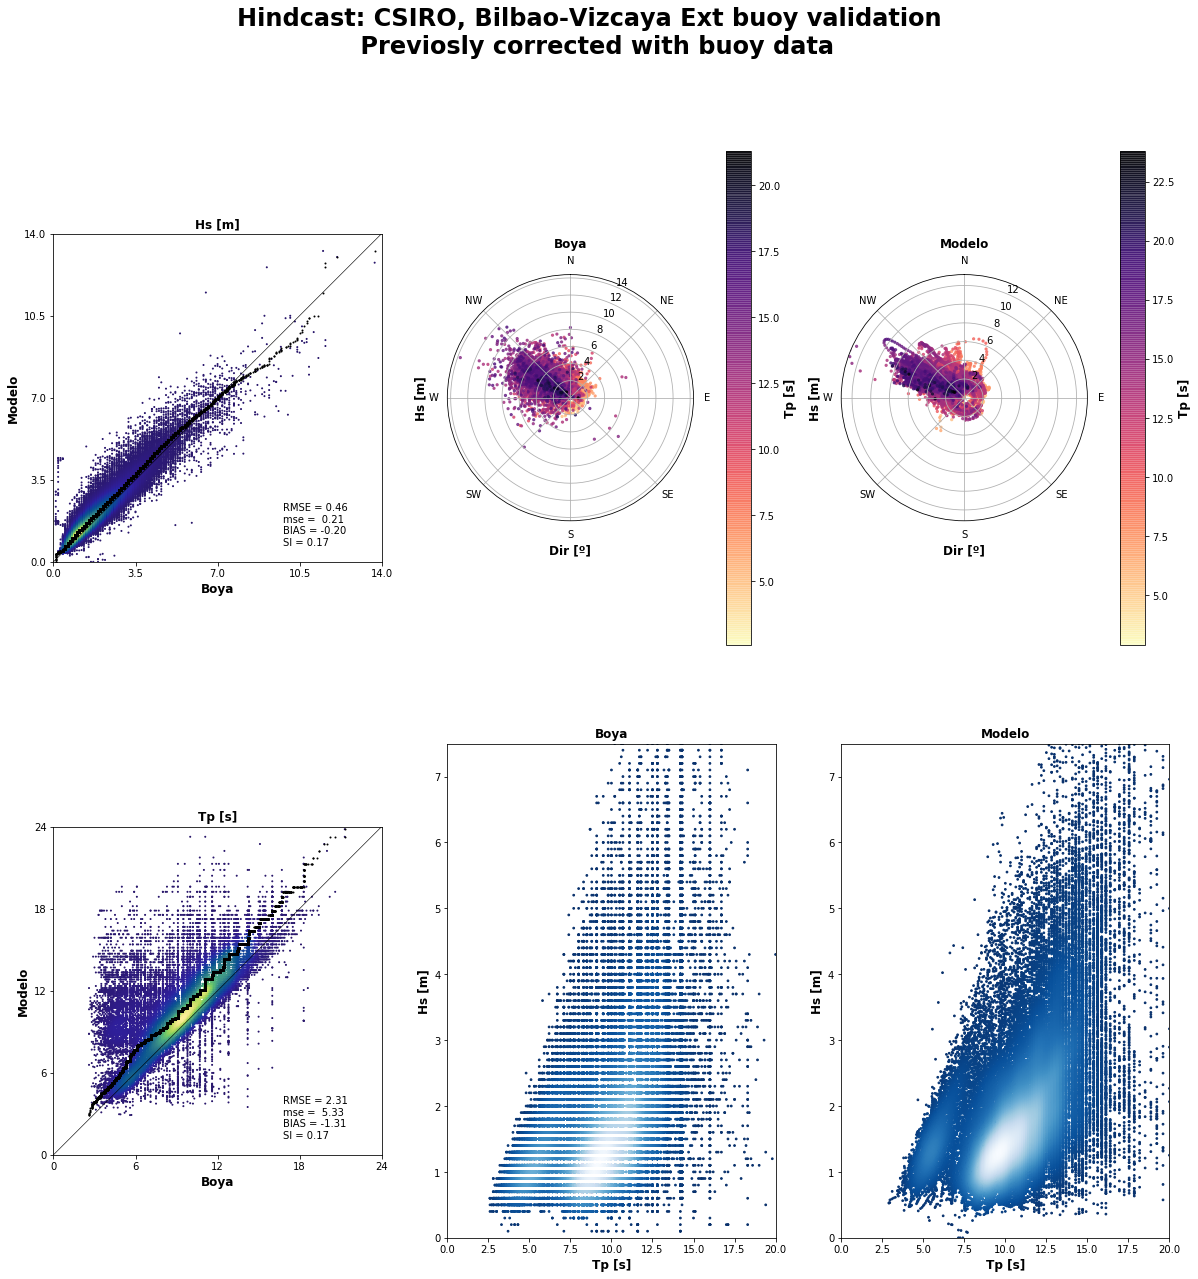

In [14]:
calval_case.buoy_validation('sat_corr')

--------------------------------------------------------
BUOY_CORR VALIDATION will be performed
-------------------------------------------------------- 
 
Validating and plotting validated data... 
 
Length of data to validate: 59119 
 


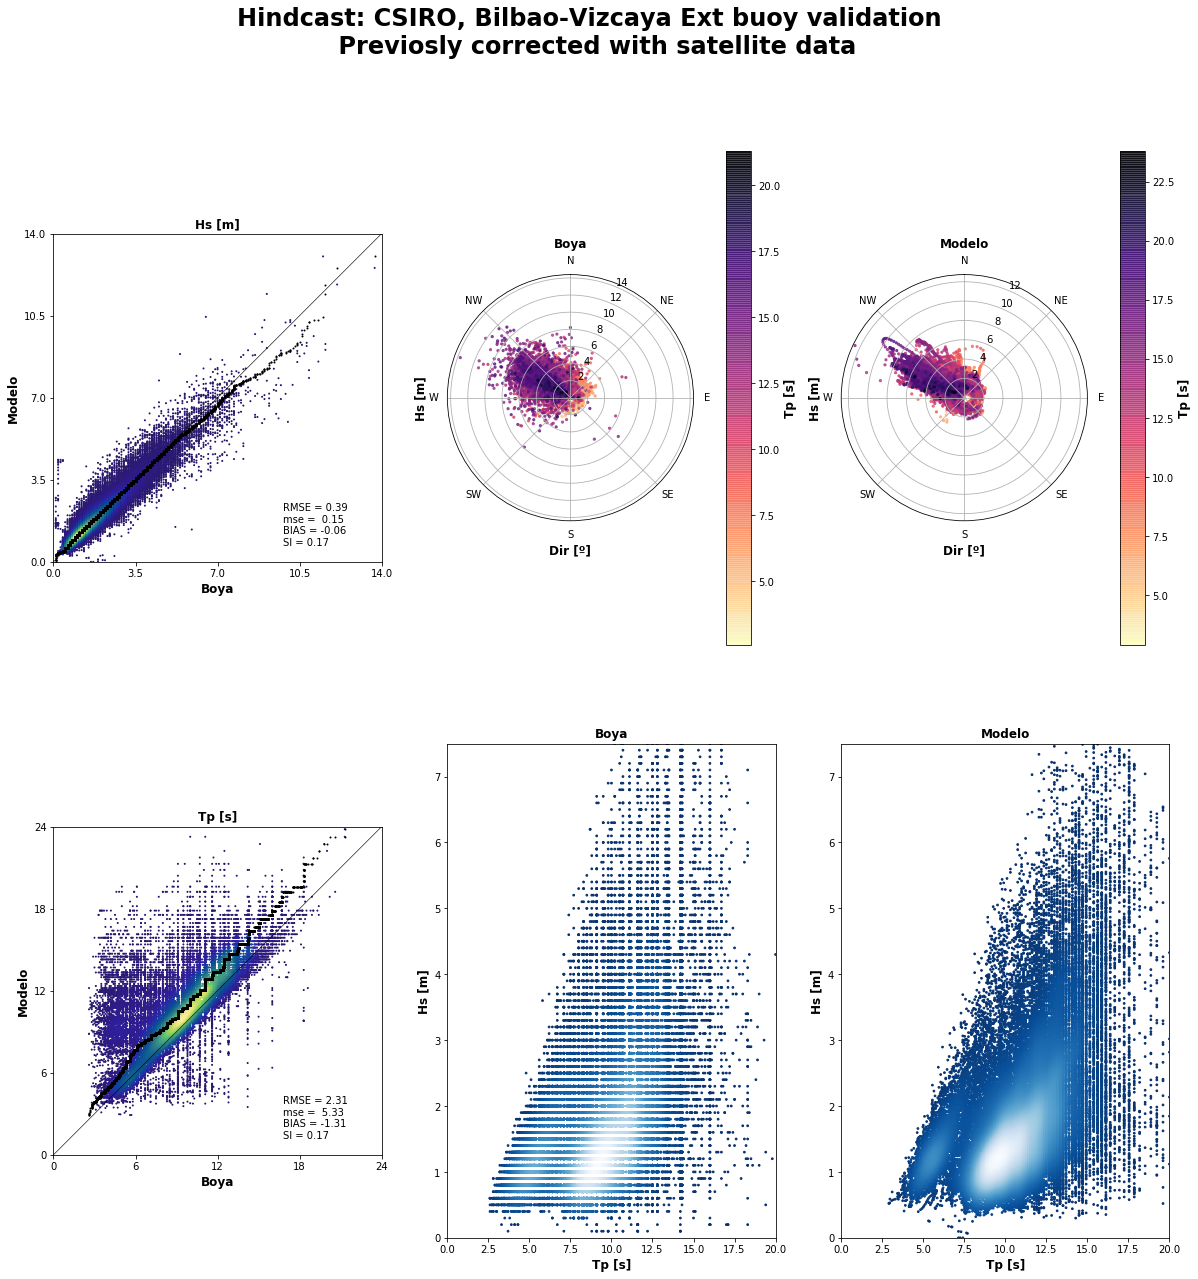

In [15]:
calval_case.buoy_validation('buoy_corr')

In [16]:
print('---------------------------------------------------')
print('Time wasted validating: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted validating: 9.72 m
---------------------------------------------------


In [18]:
print('---------------------------------------------------')
print('TOTAL time of the script: ' + str(round((time()-t0)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
TOTAL time of the script: 36.18 m
---------------------------------------------------
